In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os
# %matplotlib notebook
import glob
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

In [1]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score,precision_score,recall_score,classification_report, confusion_matrix,cohen_kappa_score,fbeta_score,roc_curve,auc,average_precision_score
import pandas as pd
from pathlib import Path
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import os
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import multilabel_confusion_matrix
from torch.utils.data import Dataset
from sklearn import svm
from sklearn.feature_selection import SelectKBest
import sklearn.feature_selection as fs

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('LogPower_windowing_normal_Outlier1.csv') 
# df.head()

In [93]:
df

,Name,Block,Scenario,Link,Junction,SafetyRate,SafetyPref_3c,Fp1_Delta,Fp1_Theta,Fp1_Alpha,...,LandUse,ResidentialUse,CommercialUse,ParkUse,LinkType,LinkType_0,LinkType_1,LinkType_2,LinkType_3,LinkType_4
0,Akrami,1,1,1,0,5,2,-0.531608,-0.377836,-0.330719,...,1,1,0,0,5,1,0,0,0,0
1,Akrami,1,1,0,1,4,1,-0.539534,-0.367659,-0.257188,...,1,1,0,0,0,0,0,0,0,0
2,Akrami,1,1,1,0,5,2,-0.540476,-0.406437,-0.279134,...,2,0,1,0,5,1,0,0,0,0
3,Akrami,1,1,0,1,4,1,-0.562314,-0.371394,-0.286403,...,2,0,1,0,0,0,0,0,0,0
4,Akrami,1,1,1,0,5,2,-0.553871,-0.400396,-0.296538,...,2,0,1,0,5,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Yaseri,5,20,1,0,3,0,-0.311689,-0.241638,-0.116113,...,2,0,1,0,1,0,1,0,0,0
1210,Yaseri,5,20,0,1,2,0,-0.088567,-0.015671,-0.001464,...,2,0,1,0,0,0,0,0,0,0
1211,Yaseri,5,20,1,0,3,0,-0.071334,0.045074,-0.013750,...,2,0,1,0,5,1,0,0,0,0
1212,Yaseri,5,20,0,1,3,0,0.135478,0.129682,-0.000747,...,3,0,0,1,0,0,0,0,0,0


In [94]:
y = df['SafetyPref_3c']
X = df.loc[:,'Fp1_Delta':'Pz_Gamma']

In [95]:
X

,Fp1_Delta,Fp1_Theta,Fp1_Alpha,Fp1_Beta,Fp1_Gamma,Fp2_Delta,Fp2_Theta,Fp2_Alpha,Fp2_Beta,Fp2_Gamma,...,Fz_Delta,Fz_Theta,Fz_Alpha,Fz_Beta,Fz_Gamma,Pz_Delta,Pz_Theta,Pz_Alpha,Pz_Beta,Pz_Gamma
0,-0.531608,-0.377836,-0.330719,-0.260388,-0.329943,0.201897,0.245790,0.261365,0.280875,0.250399,...,-0.709322,-0.516021,-0.484051,-0.469555,-0.622895,-0.620825,-0.262485,-0.557648,-0.629286,-0.666858
1,-0.539534,-0.367659,-0.257188,-0.206349,-0.265248,0.195942,0.253712,0.275291,0.301337,0.275937,...,-0.691971,-0.485309,-0.449442,-0.424381,-0.542316,-0.533778,-0.360884,-0.435588,-0.564733,-0.598961
2,-0.540476,-0.406437,-0.279134,-0.276102,-0.350929,0.195301,0.249822,0.275253,0.277088,0.250286,...,-0.735824,-0.522102,-0.429908,-0.512827,-0.656325,-0.585312,-0.281512,-0.195019,-0.638462,-0.692967
3,-0.562314,-0.371394,-0.286403,-0.293635,-0.360996,0.203416,0.260147,0.278608,0.282421,0.252797,...,-0.722905,-0.480538,-0.424826,-0.496540,-0.608450,-0.617046,-0.284887,-0.289549,-0.595136,-0.623077
4,-0.553871,-0.400396,-0.296538,-0.271136,-0.321874,0.201943,0.253412,0.270962,0.282774,0.259897,...,-0.680025,-0.485940,-0.392834,-0.461505,-0.557639,-0.555977,-0.283306,-0.132926,-0.494143,-0.562635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,-0.311689,-0.241638,-0.116113,-0.266122,-0.309455,0.311661,0.323042,0.342096,0.294809,0.288310,...,-0.247388,-0.223332,-0.251284,-0.394045,-0.420738,-0.444168,-0.248470,-0.176507,-0.544310,-0.465940
1210,-0.088567,-0.015671,-0.001464,-0.184646,-0.301132,0.364023,0.378334,0.377113,0.319721,0.286967,...,-0.257764,-0.182285,-0.206861,-0.282532,-0.413127,-0.395179,-0.272523,-0.186034,-0.137940,-0.450467
1211,-0.071334,0.045074,-0.013750,-0.155019,-0.273232,0.363244,0.384645,0.371284,0.327841,0.294526,...,-0.377650,-0.269549,-0.300234,-0.316070,-0.404438,-0.370669,-0.273914,-0.111537,-0.207334,-0.468568
1212,0.135478,0.129682,-0.000747,-0.202671,-0.340511,0.418871,0.418530,0.377887,0.312252,0.270582,...,-0.291798,-0.291618,-0.293535,-0.365758,-0.494068,-0.434447,-0.226138,-0.121055,-0.309851,-0.588259


In [96]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

In [97]:
feat_importances.nlargest(10)
l =feat_importances.nlargest(10).keys()


In [98]:
l

Index(['T4_Beta', 'F7_Theta', 'T4_Alpha', 'Fp1_Delta', 'F7_Alpha', 'T4_Theta',
       'T5_Theta', 'T5_Beta', 'T6_Beta', 'C3_Alpha'],
      dtype='object')

In [99]:
x = X[l]

In [100]:
x

,T4_Beta,F7_Theta,T4_Alpha,Fp1_Delta,F7_Alpha,T4_Theta,T5_Theta,T5_Beta,T6_Beta,C3_Alpha
0,-0.164801,-0.164620,-0.513525,-0.531608,-0.158861,-0.390904,0.325942,0.308851,-0.197504,-0.306831
1,0.067959,-0.156838,-0.288395,-0.539534,-0.130051,-0.284385,0.354608,0.367201,-0.057309,-0.266986
2,-0.159638,-0.243281,-0.411294,-0.540476,-0.135675,-0.622273,0.352804,0.346321,-0.101573,-0.202289
3,-0.288798,-0.208433,-0.396283,-0.562314,-0.136771,-0.543360,0.332231,0.322237,-0.174345,-0.207651
4,-0.442784,-0.179100,-0.339188,-0.553871,-0.071842,-0.485939,0.336293,0.301410,-0.220493,-0.141147
...,...,...,...,...,...,...,...,...,...,...
1209,-0.537381,-0.024520,-0.142769,-0.311689,-0.030492,-0.388282,0.412086,0.301960,-0.386728,-0.084610
1210,-0.335788,0.036303,-0.259349,-0.088567,-0.036698,-0.425959,0.448741,0.328649,-0.262542,-0.067320
1211,-0.429300,0.235564,-0.219395,-0.071334,0.102107,-0.191047,0.448435,0.338183,-0.278843,-0.070439
1212,-0.645295,0.198889,-0.208944,0.135478,0.044870,-0.077431,0.407409,0.316854,-0.300663,-0.097607


In [101]:
from sklearn.mixture import GaussianMixture
n_comp= 3
gm = GaussianMixture(init_params='random',
                     covariance_type='tied',
                     max_iter=200,
                     n_components=n_comp,
                     random_state=850).fit(x)
gm.means_
s = gm.fit_predict(x)
x['cluster']= s

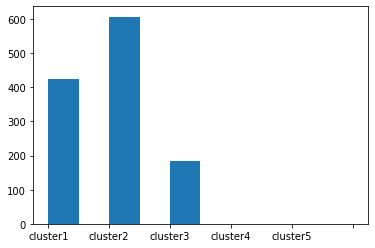

In [102]:
# s = X_positive['cluster']
fig, ax = plt.subplots()
ax.hist(s, range=(0,5))
ax.set_xticklabels(['a','cluster1','cluster2','cluster3','cluster4','cluster5'])
plt.show()

In [103]:
x

,T4_Beta,F7_Theta,T4_Alpha,Fp1_Delta,F7_Alpha,T4_Theta,T5_Theta,T5_Beta,T6_Beta,C3_Alpha,cluster
0,-0.164801,-0.164620,-0.513525,-0.531608,-0.158861,-0.390904,0.325942,0.308851,-0.197504,-0.306831,0
1,0.067959,-0.156838,-0.288395,-0.539534,-0.130051,-0.284385,0.354608,0.367201,-0.057309,-0.266986,0
2,-0.159638,-0.243281,-0.411294,-0.540476,-0.135675,-0.622273,0.352804,0.346321,-0.101573,-0.202289,0
3,-0.288798,-0.208433,-0.396283,-0.562314,-0.136771,-0.543360,0.332231,0.322237,-0.174345,-0.207651,0
4,-0.442784,-0.179100,-0.339188,-0.553871,-0.071842,-0.485939,0.336293,0.301410,-0.220493,-0.141147,0
...,...,...,...,...,...,...,...,...,...,...,...
1209,-0.537381,-0.024520,-0.142769,-0.311689,-0.030492,-0.388282,0.412086,0.301960,-0.386728,-0.084610,1
1210,-0.335788,0.036303,-0.259349,-0.088567,-0.036698,-0.425959,0.448741,0.328649,-0.262542,-0.067320,1
1211,-0.429300,0.235564,-0.219395,-0.071334,0.102107,-0.191047,0.448435,0.338183,-0.278843,-0.070439,0
1212,-0.645295,0.198889,-0.208944,0.135478,0.044870,-0.077431,0.407409,0.316854,-0.300663,-0.097607,2


In [104]:
x.to_csv('./LogPower_windowing_normal_Outlier1_3cluster.csv',index=False)

In [90]:
x_new = x.iloc[:,0:-1]

In [91]:
x_new

,T4_Beta,F7_Theta,T4_Alpha,Fp1_Delta,T4_Theta,F7_Delta,F7_Alpha,C3_Beta,T5_Delta,T5_Beta
0,-0.164801,-0.164620,-0.513525,-0.531608,-0.390904,-0.375927,-0.158861,-0.314011,0.257221,0.308851
1,0.067959,-0.156838,-0.288395,-0.539534,-0.284385,-0.355652,-0.130051,-0.268073,0.295450,0.367201
2,-0.159638,-0.243281,-0.411294,-0.540476,-0.622273,-0.348587,-0.135675,-0.307457,0.300076,0.346321
3,-0.288798,-0.208433,-0.396283,-0.562314,-0.543360,-0.413984,-0.136771,-0.290451,0.275993,0.322237
4,-0.442784,-0.179100,-0.339188,-0.553871,-0.485939,-0.367041,-0.071842,-0.286042,0.274308,0.301410
...,...,...,...,...,...,...,...,...,...,...
1247,-0.537381,-0.024520,-0.142769,-0.311689,-0.388282,-0.096737,-0.030492,-0.267954,0.495282,0.301960
1248,-0.335788,0.036303,-0.259349,-0.088567,-0.425959,-0.036258,-0.036698,-0.129016,0.486503,0.328649
1249,-0.429300,0.235564,-0.219395,-0.071334,-0.191047,0.233579,0.102107,-0.144866,0.543293,0.338183
1250,-0.645295,0.198889,-0.208944,0.135478,-0.077431,0.232680,0.044870,-0.205951,0.481162,0.316854


In [22]:
y_new = x['cluster']

In [23]:
def split(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=1,
                                                    stratify=y)
    return X_train, X_test, y_train, y_test

In [24]:
X_train_eeg, X_test_eeg, y_train_eeg, y_test_eeg = split(x_new,y_new)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


train accuracy: 1.0
test accuracy: 0.8353909465020576
f1_micro: 0.84


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.2s finished


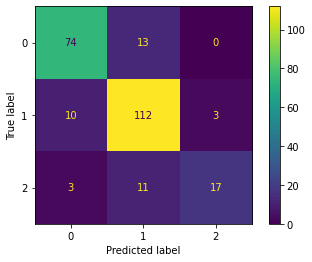

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=1200)
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))
fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)

train accuracy: 0.8949536560247168
test accuracy: 0.8559670781893004
f1_micro: 0.86


Text(0.5, 0.98, 'Confusion Matrix for Test SVM')

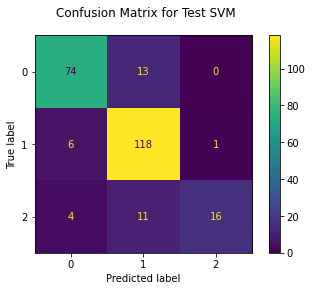

In [26]:
y_pred_eeg=[]
clf = svm.SVC(C=1.0,kernel='rbf')
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)
print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test SVM")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_SVM.png")

train accuracy: 0.9083419155509783
test accuracy: 0.897119341563786
f1_micro: 0.90


Text(0.5, 0.98, 'Confusion Matrix for Test MLP')

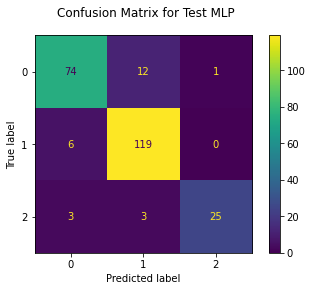

In [27]:
clf = MLPClassifier(early_stopping=True).fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
recall_macro = recall_score(y_test_eeg, y_pred_eeg,average='macro')
precision_macro = precision_score(y_test_eeg, y_pred_eeg,average='macro')
f1_macro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_macro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test MLP")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_MLP.png")

# Before clustering 

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

data= pd.read_csv('./LogPower_windowing_normal_Outlier1.csv')
y = data.loc[:,'SafetyPref_3c']
x = data.loc[:,'Fp1_Delta':'Pz_Gamma']
x_safety = x

model = ExtraTreesClassifier()
model.fit(x_safety,y)
feat_importances = pd.Series(model.feature_importances_, index=x_safety.columns)
feat_importances.nlargest(10)
l =feat_importances.nlargest(10).keys()

x = x_safety[l] 
X_train_eeg, X_test_eeg, y_train_eeg, y_test_eeg = split(x,y)

In [29]:
l

Index(['T4_Beta', 'F7_Theta', 'T4_Alpha', 'T4_Theta', 'Pz_Delta', 'P4_Gamma',
       'T3_Beta', 'T5_Beta', 'F7_Alpha', 'F7_Delta'],
      dtype='object')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


train accuracy: 1.0
test accuracy: 0.5473251028806584
f1_micro: 0.55


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    0.1s finished


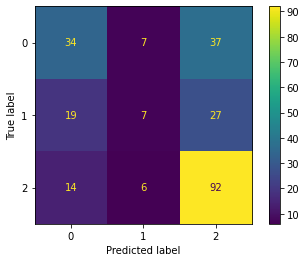

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1,n_estimators=1200)
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))
fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)

train accuracy: 0.5396498455200824
test accuracy: 0.5308641975308642
f1_micro: 0.53


Text(0.5, 0.98, 'Confusion Matrix for Test SVM')

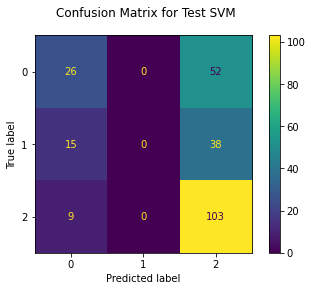

In [31]:
y_pred_eeg=[]
clf = svm.SVC(C=1.0,kernel='rbf')
clf.fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
f1_micro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)
print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_micro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test SVM")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_SVM.png")

train accuracy: 0.4984552008238929
test accuracy: 0.5061728395061729
f1_micro: 0.51


Text(0.5, 0.98, 'Confusion Matrix for Test MLP')

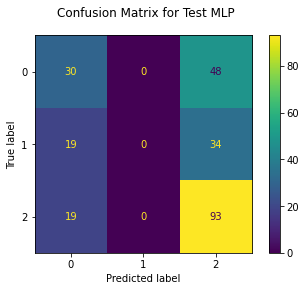

In [32]:
clf = MLPClassifier(early_stopping=True).fit(X_train_eeg, y_train_eeg)
y_pred_eeg = clf.predict(X_test_eeg)
recall_macro = recall_score(y_test_eeg, y_pred_eeg,average='macro')
precision_macro = precision_score(y_test_eeg, y_pred_eeg,average='macro')
f1_macro = f1_score(y_test_eeg, y_pred_eeg,average='micro')
tarin_acc = clf.score(X_train_eeg,y_train_eeg)
test_acc = clf.score(X_test_eeg,y_test_eeg)

print("train accuracy:",tarin_acc)
print("test accuracy:",test_acc)
print('f1_micro: {0:0.2f}'.format(f1_macro))

fig=plot_confusion_matrix(clf, X_test_eeg,y_test_eeg)
fig.figure_.suptitle("Confusion Matrix for Test MLP")
# plt.savefig("./figs/confmatrix/Wave_Cz_8Feature_MLP.png")